## Introduction
_____________________________________________
##### Dans le cadre d'un appel à projet de l'agence "Santé Publique France", nous sommes chargés de proposer une idée innovante d'application en lien avec l'alimentation

##### Jeu de données: Open Food Fact

- [Traiter le jeu de données afin de repérer des variables pertinentes](#1) :
- [Produire des visualisations (analyse univariée pour chaque variable intéressante](#2) :
- [Confirmer ou infirmer hypothèses avec analyse multivariée. Effectuer tests statistiques appropriés](#3) :
- Élaborer une idée d’application

### Analyse Exploratoire 
##### Analyse de forme:

- **Variable Target:** Nutrigrade
- **Ligne - Colonnes:** 1981823, 186
- **Types de Variables:** qualitatives: 60, quantitatives: 126
- **Valeurs manquantes:** Beaucoup de Nan (64% variables ont plus de 90% de NaN).
- **Valeurs aberrantes:** Suppression de 161 529 lignes aberrantes (Valeurs pour 100g > 100 ainsi que quantité sucres > quantité glucides et quantité gras saturé > quantité de gras).
- **Lignes redondantes:** Suppression de 202 061 lignes redondantes

##### Analyse de fond:

- **Visualisation Target:** Répartition en 5 groupes: 'a' et 'b' autour de 25k produits, 'c' et 'd' autour de 40k et 'e' à 60k.
- **Signification des variables:** Aucune des variables ne suit une loi normale. Elles presentent toutes une répartition de leurs valeurs Q1-Q3 entre 0-20g, autour d'une moyenne proche (sauf cas des Glucides plus "étalés"). L'Energie suit une répartition proche de celle des Glucides.
- **Relation variables/target:** Lien entre Nutri grade et Energie, Gras et Glucides.
- **Relation variable/variable:** Corrélations entre Graisse et Energie, Matières grasses et Acides gras saturés, Sucres et Glucides, et enfin Energie et Glucides

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
df_cleaned = pd.read_csv(r"C:\Users\Damien\Desktop\Data Scientist\P3\Dataset\en.openfoodfacts.org.products.csv")

## <a id =2 style='color:Green'> Analyse Univariée </a>
<span style='color:Green'> _____ </span>

### Mask France

In [4]:
# Travail sur les produits Francais
df_fr = df_cleaned[df_cleaned['countries_en'] == 'France']

In [5]:
df_fr.describe()

,additives_n,ingredients_from_palm_oil_n,nutriscore_score,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
count,118377.000000,118377.000000,197233.000000,197233.000000,197233.000000,197233.000000,197233.000000,197233.000000,197233.000000,197233.000000
mean,1.842512,0.050255,9.452840,266.542963,13.916479,5.399297,25.498574,12.874087,8.624508,1.049605
std,2.467877,0.221428,8.783151,175.873877,15.832521,7.689204,25.903160,18.303436,8.632443,2.307757
min,0.000000,0.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,120.000000,1.500000,0.300000,3.100000,0.800000,2.100000,0.100000
50%,1.000000,0.000000,10.000000,243.000000,8.500000,2.200000,13.800000,3.500000,6.400000,0.609600
75%,3.000000,0.000000,16.000000,387.000000,22.000000,7.700000,49.000000,18.100000,12.300000,1.300000
max,30.000000,2.000000,40.000000,999.000000,99.990000,99.300000,99.950000,99.950000,99.000000,99.000000


In [6]:
# Formatage des noms de colonnes problématiques
df_fr = df_fr.rename(columns={"energy-kcal_100g": "energy_kcal_100g", "saturated-fat_100g": "saturated_fat_100g"})

### Displot

#### Target

Text(0.5, 1.0, 'Nutri Score')

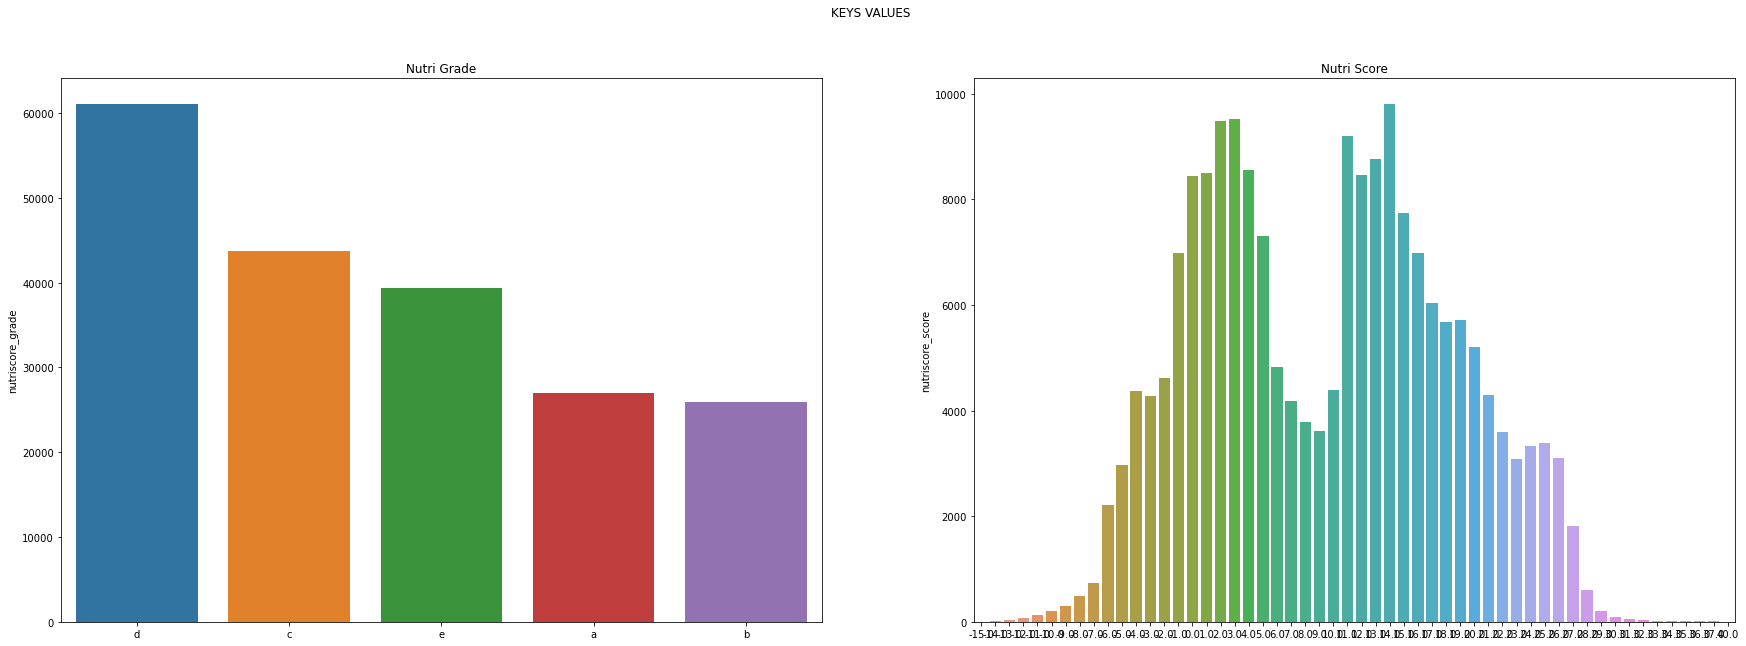

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10), sharey=False)
fig.suptitle('KEYS VALUES')

# grade
sns.barplot(ax=axes[0], x=df_fr.nutriscore_grade.value_counts().index, y=df_fr.nutriscore_grade.value_counts())
axes[0].set_title('Nutri Grade')

# score
sns.barplot(ax=axes[1], x=df_fr.nutriscore_score.value_counts().index, y=df_fr.nutriscore_score.value_counts())
axes[1].set_title('Nutri Score')

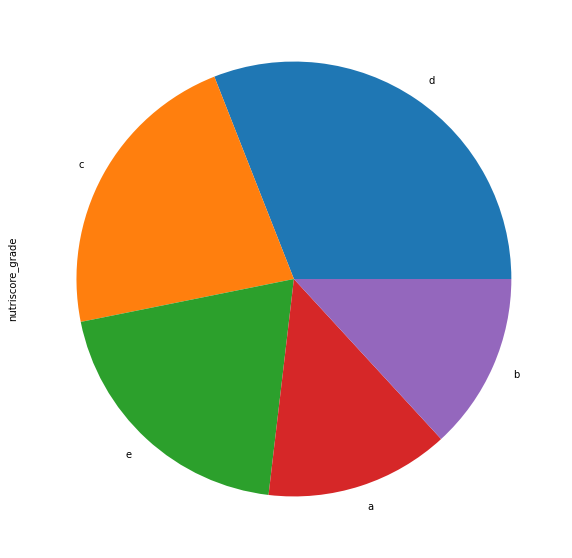

In [8]:
plt.figure(figsize=(10,10))
df_fr.nutriscore_grade.value_counts().plot.pie()
plt.show()

#### Variables

Text(0.5, 1.0, 'ingredients_from_palm_oil_n')

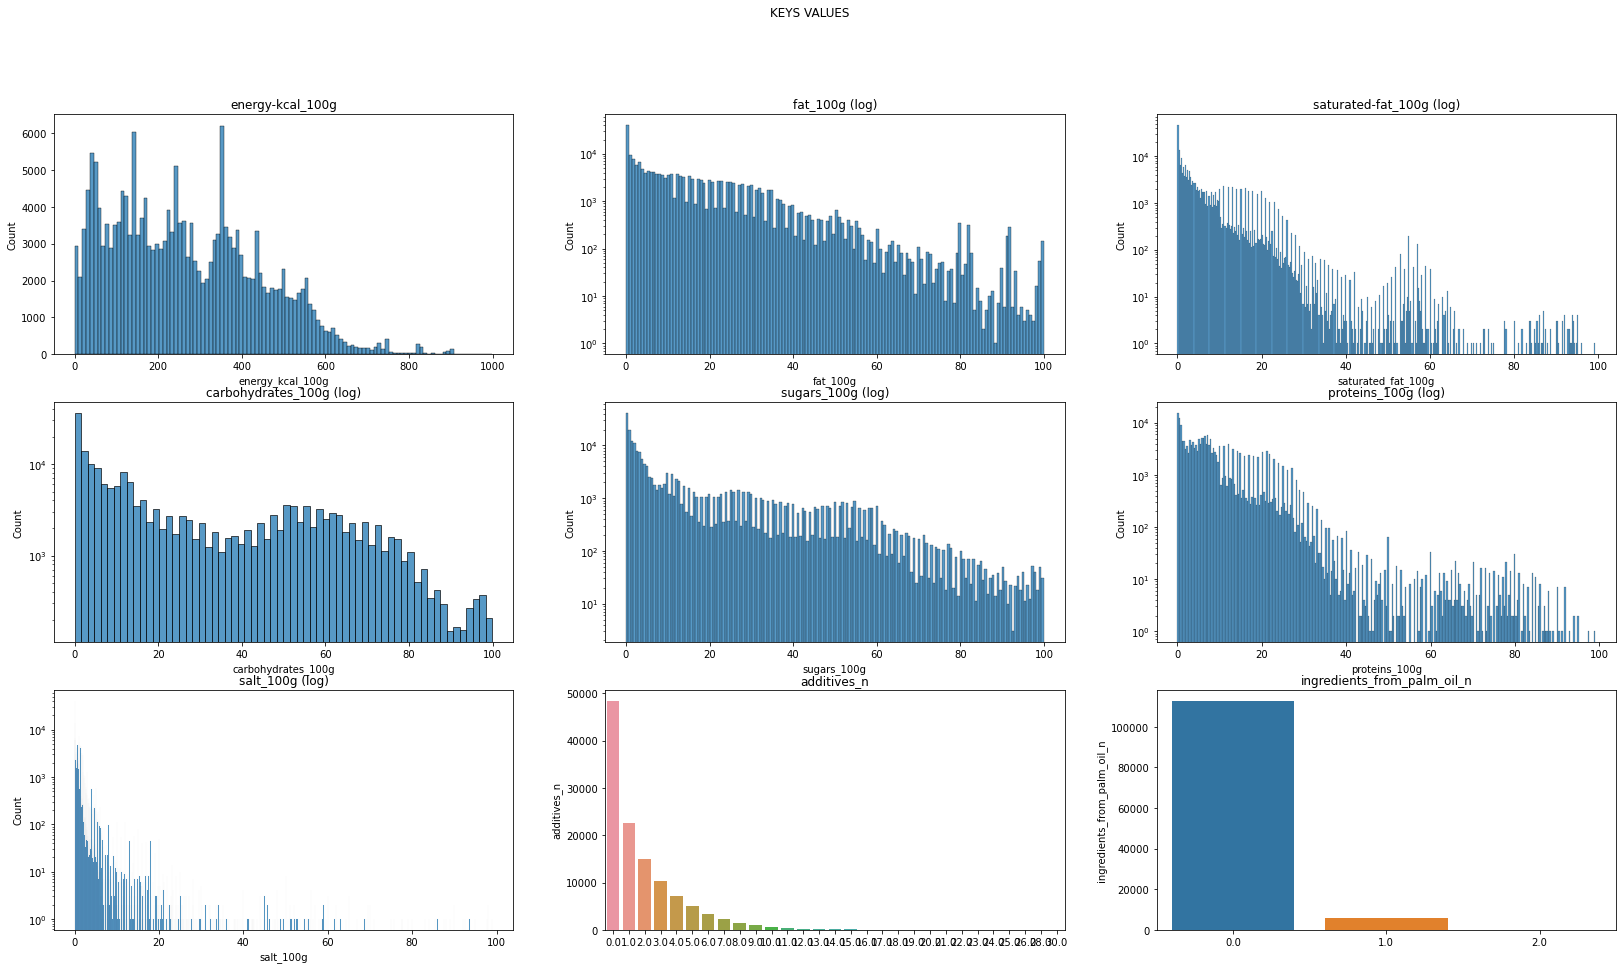

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(28, 15), sharey=False)
fig.suptitle('KEYS VALUES')

# energy-kcal_100g
sns.histplot(ax=axes[0, 0], data=df_fr, x="energy_kcal_100g")
axes[0, 0].set_title('energy-kcal_100g')

# fat_100g
sns.histplot(ax=axes[0, 1], data=df_fr, x="fat_100g", log_scale=(False, True))
axes[0, 1].set_title('fat_100g (log)')

# saturated-fat_100g
sns.histplot(ax=axes[0, 2], data=df_fr, x="saturated_fat_100g", log_scale=(False, True))
axes[0, 2].set_title('saturated-fat_100g (log)')

# carbohydrates_100g
sns.histplot(ax=axes[1, 0], data=df_fr, x="carbohydrates_100g", log_scale=(False, True))
axes[1, 0].set_title('carbohydrates_100g (log)')

# sugars_100g
sns.histplot(ax=axes[1, 1], data=df_fr, x="sugars_100g", log_scale=(False, True))
axes[1, 1].set_title('sugars_100g (log)')

# proteins_100g
sns.histplot(ax=axes[1, 2], data=df_fr, x="proteins_100g", log_scale=(False, True))
axes[1, 2].set_title('proteins_100g (log)')

# salt_100g
sns.histplot(ax=axes[2, 0], data=df_fr, x="salt_100g", log_scale=(False, True))
axes[2, 0].set_title('salt_100g (log)')

# additives_n
sns.barplot(ax=axes[2, 1], x=df_fr.additives_n.value_counts().index, y=df_fr.additives_n.value_counts())
axes[2, 1].set_title('additives_n')

# ingredients_from_palm_oil_n
sns.barplot(ax=axes[2, 2], x=df_fr.ingredients_from_palm_oil_n.value_counts().index, y=df_fr.ingredients_from_palm_oil_n.value_counts())
axes[2, 2].set_title('ingredients_from_palm_oil_n')

Text(0.5, 1.0, 'Energie')

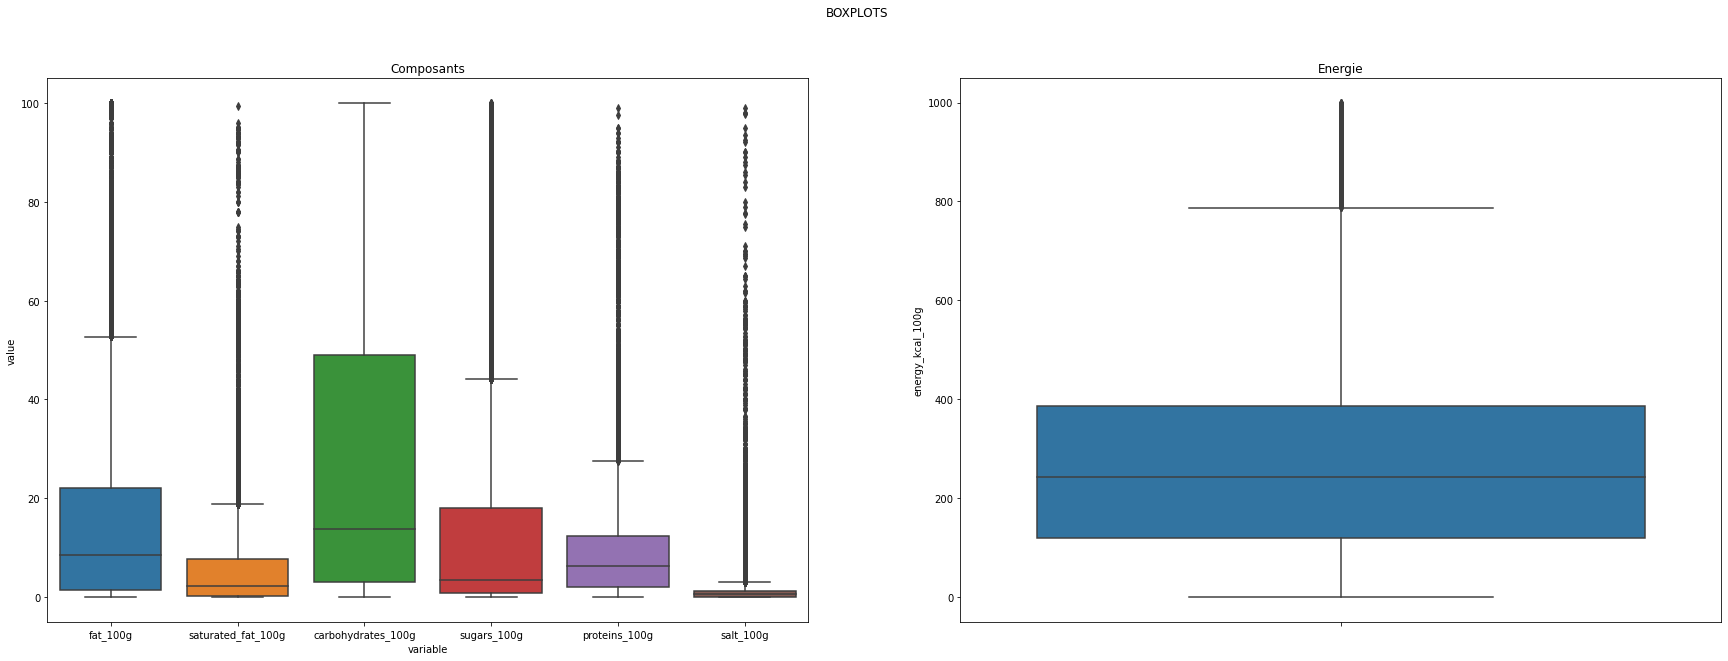

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10), sharey=False)
fig.suptitle('BOXPLOTS')

# Composants
df = pd.DataFrame(data=df_fr, columns=["fat_100g", "saturated_fat_100g", "carbohydrates_100g", "sugars_100g", "proteins_100g", "salt_100g"])
sns.boxplot(ax=axes[0], x="variable", y="value", data=pd.melt(df))
axes[0].set_title('Composants')

# score
sns.boxplot(ax=axes[1], y=df_fr['energy_kcal_100g'], data=df_fr)
axes[1].set_title('Energie')

## <a id =3 style='color:Green'> Analyse Bivarié </a>
<span style='color:Green'> _____ </span>

### Pairplot

In [11]:
# On crée un sample pour pouvoir afficher le pairplot
df_sample = df_fr.sample(n=10000)

In [12]:
df_sample_pair = df_sample.drop(['additives_n','ingredients_from_palm_oil_n'], axis=1)

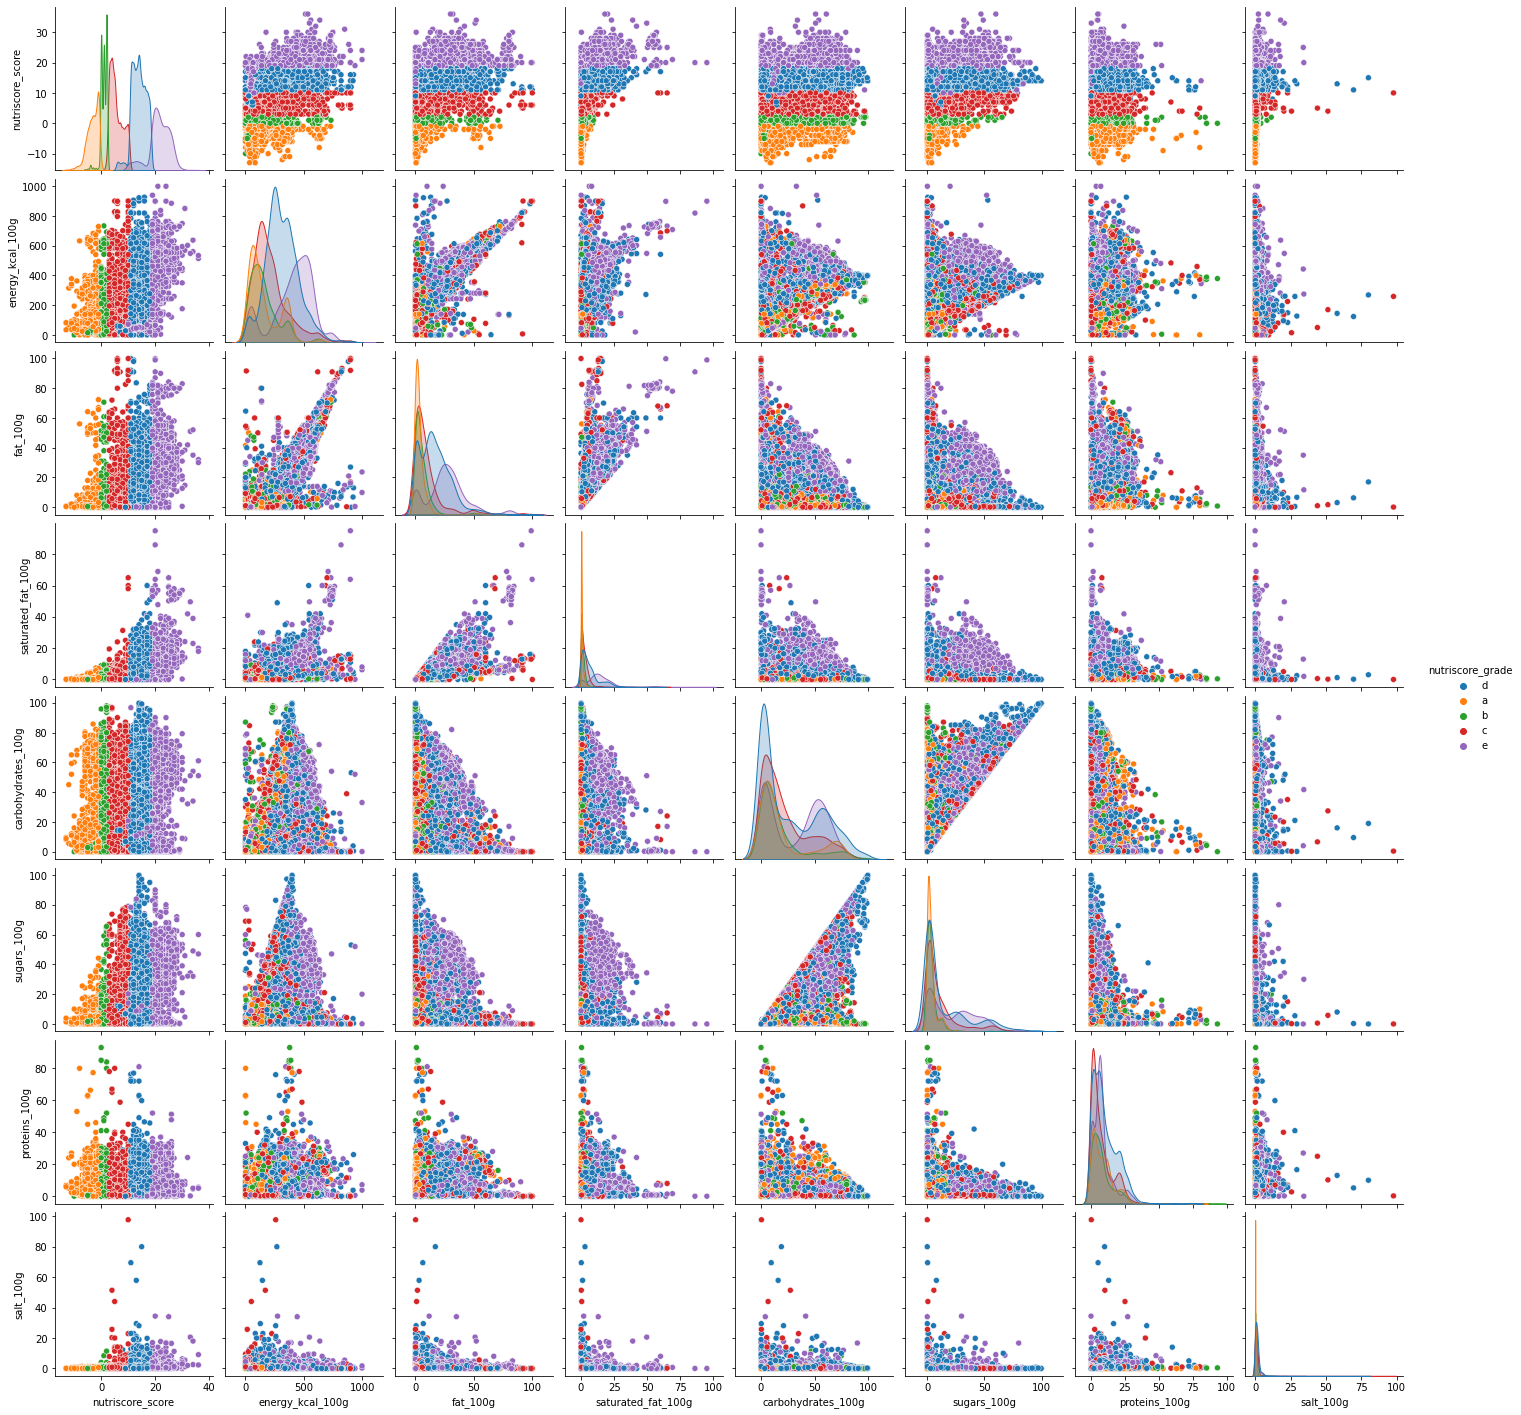

In [13]:
sns.pairplot(df_sample_pair, hue='nutriscore_grade')
# Lien direct entre Nutri score et Nutri grade
# Liens entre Nutri grade et Energie, Gras et Glucides (non superposition des courbes)

In [14]:
df_sample_pair2 = df_sample_pair.drop(['nutriscore_score'], axis=1)

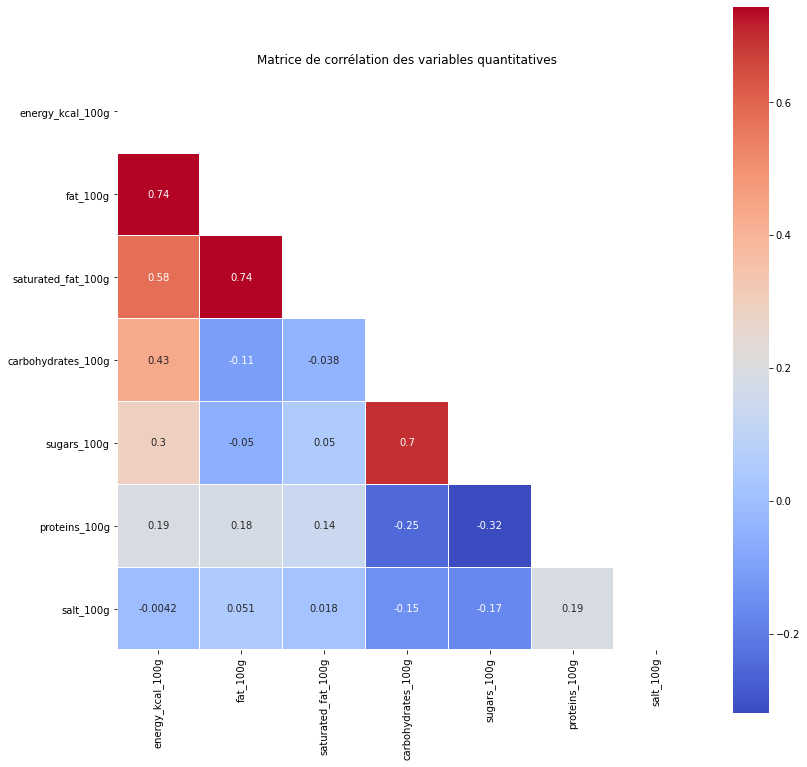

In [20]:
corr_matrix = df_sample_pair2.corr()
mask = np.triu(corr_matrix)

plt.figure(figsize=(13,13))
sns.heatmap(corr_matrix, cmap="coolwarm", mask=mask, linewidths=.5, annot=True, cbar=True, square=True)
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

# Évalutation de la corrélation entre variables quantitatives:
# Corrélation positive importante entre Graisses et Energie
# Corrélation positive importante entre Graisses et Graisses Saturées
# Corrélation positive importante entre Sucres et Glucides
# Corrélation positive entre Energie et Glucides

### ANOVA - Analyse Target/Variables

In [19]:
import pingouin as pg

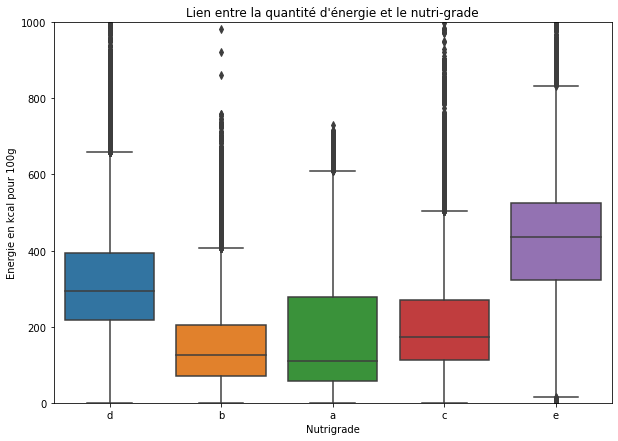

In [77]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='nutriscore_grade', y='energy_kcal_100g', data=df_fr)
plt.title("Lien entre la quantité d'énergie et le nutri-grade")
plt.xlabel("Nutrigrade")
plt.ylabel("Energie en kcal pour 100g")
plt.ylim((0,1000))
plt.show()

In [78]:
pg.anova(data=df_fr, dv="energy_kcal_100g", between="nutriscore_grade", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,nutriscore_grade,1.569654e+09,4,3.924135e+08,17081.006825,0.0,0.257291
1,Within,4.531052e+09,197228,2.297367e+04,NaN,NaN,NaN


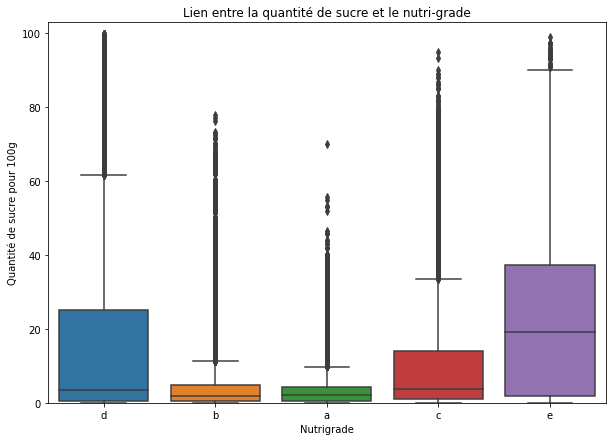

In [80]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='nutriscore_grade', y='sugars_100g', data=df_fr)
plt.title("Lien entre la quantité de sucre et le nutri-grade")
plt.xlabel("Nutrigrade")
plt.ylabel("Quantité de sucre pour 100g")
plt.ylim((0,103))
plt.show()

In [86]:
pg.anova(data=df_fr, dv="sugars_100g", between="nutriscore_grade", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,nutriscore_grade,8.176417e+06,4,2.044104e+06,6963.016233,0.0,0.123743
1,Within,5.789942e+07,197228,2.935659e+02,NaN,NaN,NaN


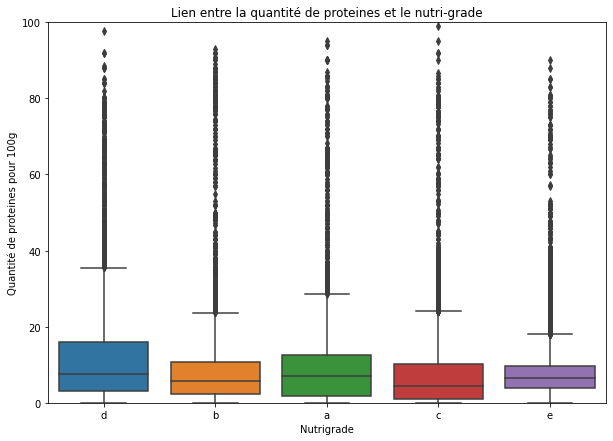

In [87]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='nutriscore_grade', y='proteins_100g', data=df_fr)
plt.title("Lien entre la quantité de proteines et le nutri-grade")
plt.xlabel("Nutrigrade")
plt.ylabel("Quantité de proteines pour 100g")
plt.ylim((0,100))
plt.show()

In [88]:
pg.anova(data=df_fr, dv="proteins_100g", between="nutriscore_grade", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,nutriscore_grade,2.394745e+05,4,59868.624701,816.690521,0.0,0.016294
1,Within,1.445807e+07,197228,73.306379,NaN,NaN,NaN


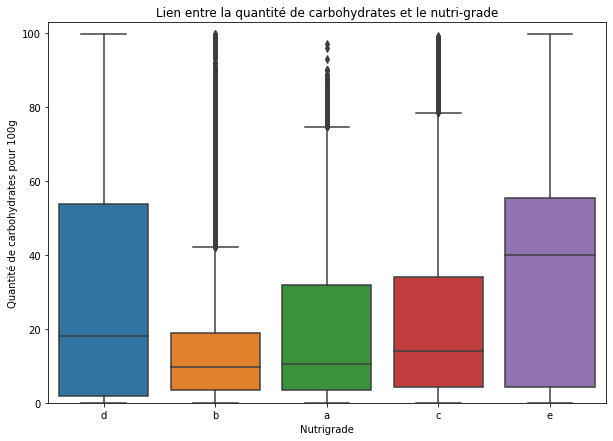

In [89]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='nutriscore_grade', y='carbohydrates_100g', data=df_fr)
plt.title("Lien entre la quantité de carbohydrates et le nutri-grade")
plt.xlabel("Nutrigrade")
plt.ylabel("Quantité de carbohydrates pour 100g")
plt.ylim((0,103))
plt.show()

In [90]:
pg.anova(data=df_fr, dv="carbohydrates_100g", between="nutriscore_grade", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,nutriscore_grade,5.474824e+06,4,1.368706e+06,2127.869312,0.0,0.04137
1,Within,1.268627e+08,197228,6.432284e+02,NaN,NaN,NaN


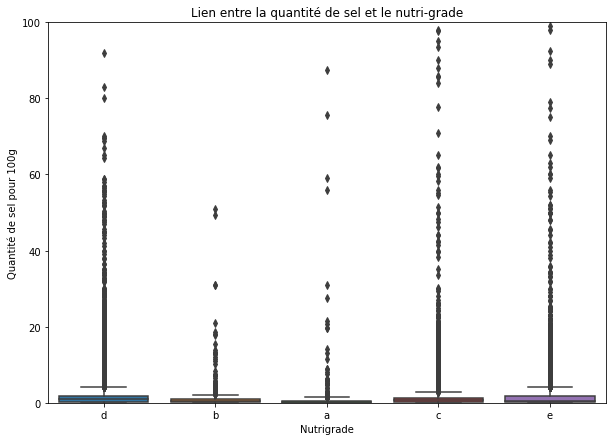

In [91]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='nutriscore_grade', y='salt_100g', data=df_fr)
plt.title("Lien entre la quantité de sel et le nutri-grade")
plt.xlabel("Nutrigrade")
plt.ylabel("Quantité de sel pour 100g")
plt.ylim((0,100))
plt.show()

In [92]:
pg.anova(data=df_fr, dv="salt_100g", between="nutriscore_grade", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,nutriscore_grade,3.575564e+04,4,8938.910688,1737.546302,0.0,0.03404
1,Within,1.014651e+06,197228,5.144560,NaN,NaN,NaN


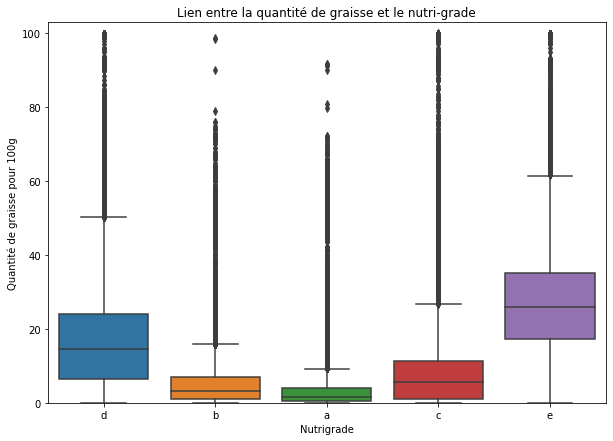

In [93]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='nutriscore_grade', y='fat_100g', data=df_fr)
plt.title("Lien entre la quantité de graisse et le nutri-grade")
plt.xlabel("Nutrigrade")
plt.ylabel("Quantité de graisse pour 100g")
plt.ylim((0,103))
plt.show()

In [94]:
pg.anova(data=df_fr, dv="fat_100g", between="nutriscore_grade", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,nutriscore_grade,1.169026e+07,4,2.922564e+06,15269.327724,0.0,0.236454
1,Within,3.774963e+07,197228,1.914010e+02,NaN,NaN,NaN


### PCA

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math

In [100]:
pca_df = df_fr.reset_index()

In [101]:
pca_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [102]:
pca_df.fillna(999, inplace=True)

In [103]:
n_comp = 2
scaler = StandardScaler()
pca = PCA(n_components=n_comp)

data = pca_df[[ 'energy_kcal_100g', 'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g']]

X = data.values
features = data.columns
X_scaled = scaler.fit_transform(X)
pca_components = pca.fit_transform(X_scaled)
pcs = pca.components_

In [104]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                      plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            an = np.linspace(0, 2 * np.pi, 100)  # Add a unit circle for scale
            plt.plot(np.cos(an), np.sin(an))
            plt.axis('equal')

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

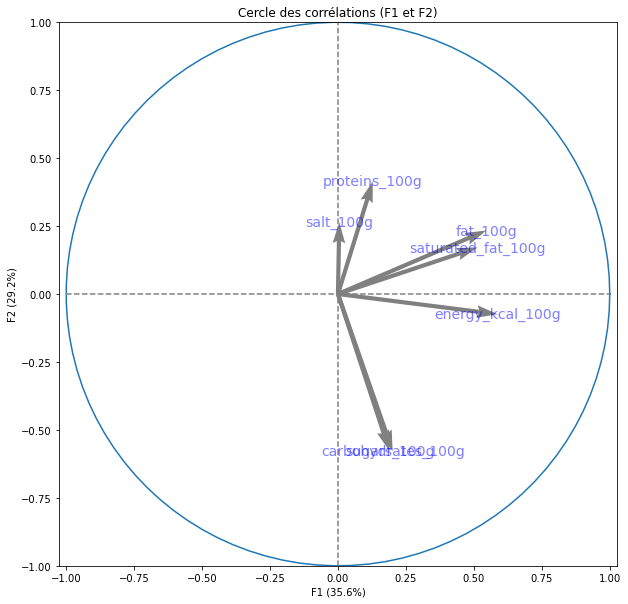

In [105]:
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

F1 (35.6%) : Energie et Graisses (+ Graisses saturées)
F2 (29.2%) : Glucides (+ sucres), Protéines, Sel
=> 64.8% de variance expliquée

## KNN

In [106]:
df_fr = df_fr.drop(['countries_en','additives_n', 'ingredients_from_palm_oil_n', 'nutriscore_score', ], axis=1)

In [109]:
df_knn = df_fr.sample(n=20000)
df_knn

,nutriscore_grade,pnns_groups_2,energy_kcal_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
product_name,,,,,,,,,
Chips soufflées aux Algues et Lentilles corail,c,unknown,330.0,2.0,0.0,61.0,1.0,14.0,1.000
Cacahuètes grillées sans sel ajouté,b,Nuts,602.0,47.2,4.9,14.5,6.1,26.4,0.010
Gratin de courgettes,c,One-dish meals,111.0,8.2,4.4,4.7,3.1,3.8,0.800
Riz Basmati Demi-Complet,b,Cereals,356.0,2.8,0.9,74.4,0.3,6.4,0.009
British Mature Cheddar lighter,d,Cheese,314.0,22.1,13.8,0.8,0.1,27.9,1.800
...,...,...,...,...,...,...,...,...,...
Nonnettes de Dijon fourrées à la confiture de figues,d,Biscuits and cakes,330.0,2.2,0.5,77.0,49.0,3.0,0.440
"Fromage frais nature, 0% de mat. Gr.",a,Dairy desserts,46.0,0.0,0.0,4.1,4.1,7.3,0.100
Olives Vertes farcis à la pâte d'anchois,d,Salty and fatty products,162.0,15.6,2.9,0.0,0.0,1.5,2.800


In [110]:
X = df_knn.iloc[:, 2:].values
y = df_knn.iloc[:, 0].values

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
X_train.shape

(16000, 7)

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':range(1,8)}
knn = KNeighborsClassifier()
classifier = GridSearchCV(knn, param_grid=param_grid, cv=6)
classifier.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 8)})

In [115]:
y_pred = classifier.predict(X_test)

In [116]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 440   81   31    4    3]
 [  86  316   80   11    3]
 [  48  115  577  131   15]
 [  11   18  127 1011   66]
 [  23    7   30  100  666]]
              precision    recall  f1-score   support

           a       0.72      0.79      0.75       559
           b       0.59      0.64      0.61       496
           c       0.68      0.65      0.67       886
           d       0.80      0.82      0.81      1233
           e       0.88      0.81      0.84       826

    accuracy                           0.75      4000
   macro avg       0.74      0.74      0.74      4000
weighted avg       0.76      0.75      0.75      4000



In [117]:
X_train.shape

(16000, 7)

In [118]:
essai = X_test[250]
essai 

array([-0.50325193, -0.88891352, -0.6887239 ,  1.05248581,  2.19149232,
       -1.00949361, -0.44491267])

In [119]:
essai = essai.reshape(1,-1)

In [120]:
classifier.predict(essai)

array(['c'], dtype=object)

In [121]:
classifier.score(X_test, y_test)

0.7525

In [122]:
classifier.predict_proba(X_test)

array([[0. , 0. , 0. , 0.8, 0.2],
       [0. , 0. , 1. , 0. , 0. ],
       [0.2, 0.6, 0.2, 0. , 0. ],
       ...,
       [0. , 0. , 0.4, 0.4, 0.2],
       [0. , 0. , 0. , 0.2, 0.8],
       [0.4, 0.2, 0.4, 0. , 0. ]])

In [123]:
y_test[10]

'd'

In [124]:
classifier.best_estimator_

KNeighborsClassifier()

In [125]:
classifier.cv_results_

{'mean_fit_time': array([0.0252167 , 0.02577416, 0.0252651 , 0.02526971, 0.02526538,
        0.02776138, 0.02509987]),
 'std_fit_time': array([0.00070673, 0.00068847, 0.00110385, 0.00047728, 0.00046999,
        0.00544529, 0.00037164]),
 'mean_score_time': array([0.07370925, 0.07961619, 0.08377139, 0.08710126, 0.08892914,
        0.09308239, 0.09557664]),
 'std_score_time': array([0.00161649, 0.00133833, 0.00114753, 0.00179098, 0.00134042,
        0.00137125, 0.00176115]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7}],
 'split0_test_score': array([0.70266217, 0.67416573, 0.71953506, 0.71316085, 0.72890889,
        0.72590926, 0.73378328]),
 'split1_test_score': array([0.71578553, 0.687664